In [12]:
# 导入工具库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 读取数据
df = pd.read_excel('./onlineretail/Online_Retail.xlsx')
df = df[df['CustomerID'].notna()]
# 数据采样
df_fix = df.sample(10000, random_state = 42)

In [13]:
# 只保留日期
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date
# 总金额
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]
# 最近消费时间点快照
snapshot_date = max(df_fix.InvoiceDate) + pd.Timedelta(days=1)
# 统计聚合
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})
# 重命名字段
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

/tmp/ipykernel_118/2603558623.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers['Recency'], ax=ax[0])
/tmp/ipykernel_118/2603558623.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers['Frequency'], ax=ax[1])
/tmp/ipykernel_118/2603558623.py:6: UserWarning: 

`distplot` is a

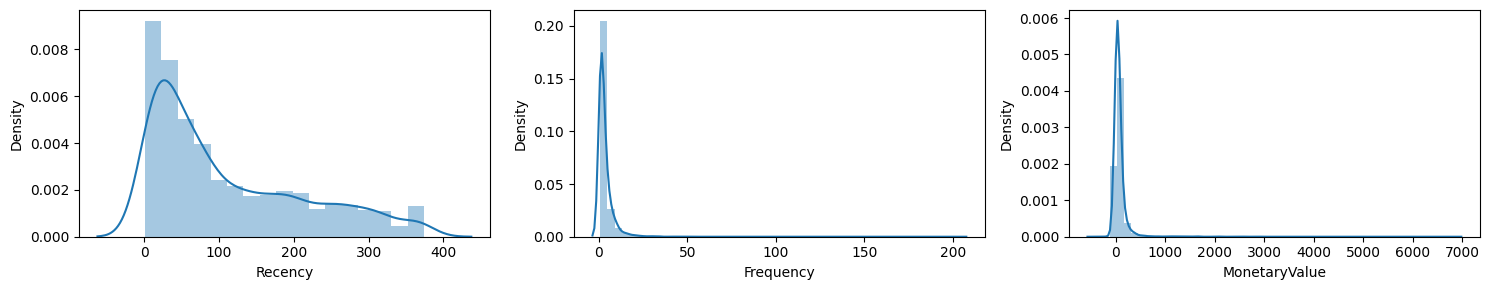

In [24]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

/tmp/ipykernel_118/2182937455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers[x], ax=ax[0,0])
/tmp/ipykernel_118/2182937455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customers[x]), ax=ax[0,1])
/tmp/ipykernel_118/2182937455.py:6: UserWarning: 

`distplot` is a depre

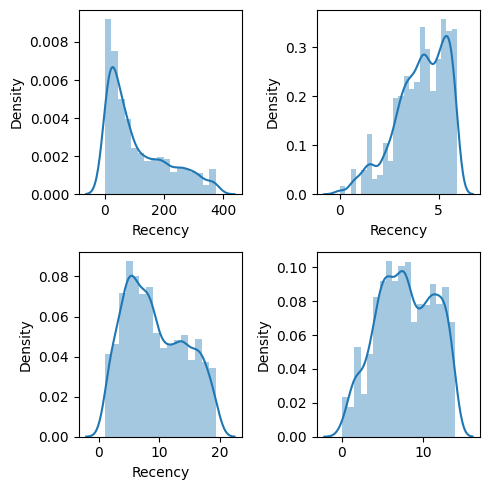

0.93
-0.72
0.32
-0.1


In [23]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))
analyze_skewness('Recency')

/tmp/ipykernel_118/2182937455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers[x], ax=ax[0,0])
/tmp/ipykernel_118/2182937455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customers[x]), ax=ax[0,1])
/tmp/ipykernel_118/2182937455.py:6: UserWarning: 

`distplot` is a depre

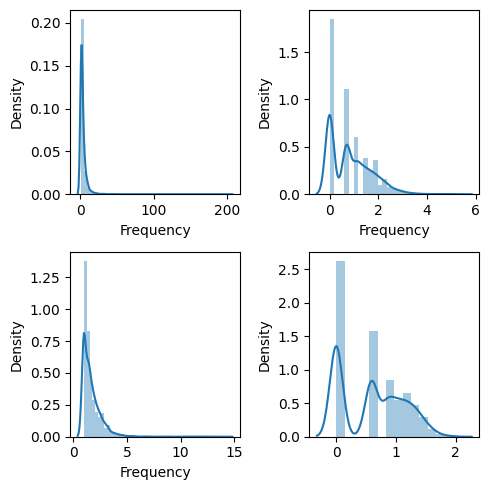

14.77
0.85
3.67
0.16


In [25]:
analyze_skewness('Frequency')

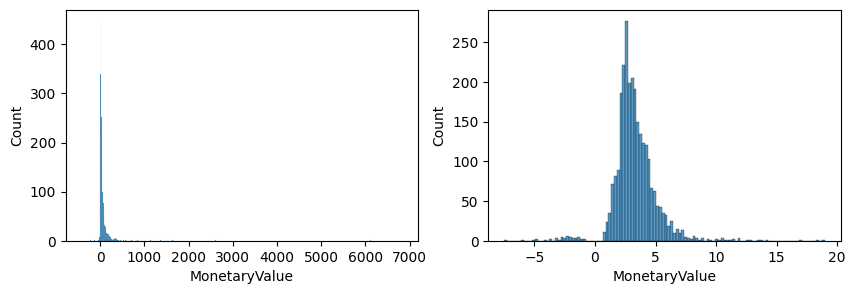

16.63
1.16


In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.histplot(customers['MonetaryValue'], ax=ax[0])
sns.histplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [30]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2685,7.832068,0.591193,3.408514
2686,1.269495,1.435599,5.907565
2687,4.288385,0.591193,-1.669108
2688,1.665555,1.615329,4.273206
2689,6.340700,1.017445,4.087250


In [34]:
# 导入库 
from sklearn.preprocessing import StandardScaler 
# 初始化对象 
scaler = StandardScaler()
# 拟合和转换数据 
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix) 
# 均值为 0，方差为 1 
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0。 0.] 
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0.  0.]
[1. 1. 1.]


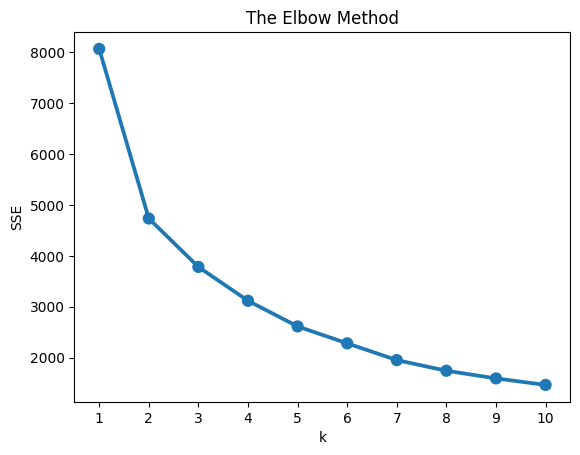

In [35]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [36]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2690,)

In [37]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         46.25      7.71        165.79   924
1         47.62      1.61         21.51   811
2        227.29      1.64         28.70   955